## Dataset1

Coeficiente de Silhueta KMeans para 2 clusters: 0.74
Coeficiente de Silhueta KMeans para 3 clusters: 0.41
Coeficiente de Silhueta KMeans para 4 clusters: 0.09
Coeficiente de Silhueta KMeans para 5 clusters: 0.09
Coeficiente de Silhueta KMeans para 6 clusters: 0.08
Coeficiente de Silhueta KMeans para 7 clusters: 0.08
Coeficiente de Silhueta KMeans para 8 clusters: 0.08
Coeficiente de Silhueta KMeans para 9 clusters: 0.08
Coeficiente de Silhueta KMeans para 10 clusters: 0.09
Coeficiente de Silhueta Hierárquico para 2 clusters: 0.7354770541571335
Coeficiente de Silhueta Hierárquico para 3 clusters: 0.3970222500920235
Coeficiente de Silhueta Hierárquico para 4 clusters: 0.06467294841467713
Coeficiente de Silhueta Hierárquico para 5 clusters: 0.062153137703597594
Coeficiente de Silhueta Hierárquico para 6 clusters: 0.05775793866474031
Coeficiente de Silhueta Hierárquico para 7 clusters: 0.04493805838019346
Coeficiente de Silhueta Hierárquico para 8 clusters: 0.04081457081992275
Coeficiente 

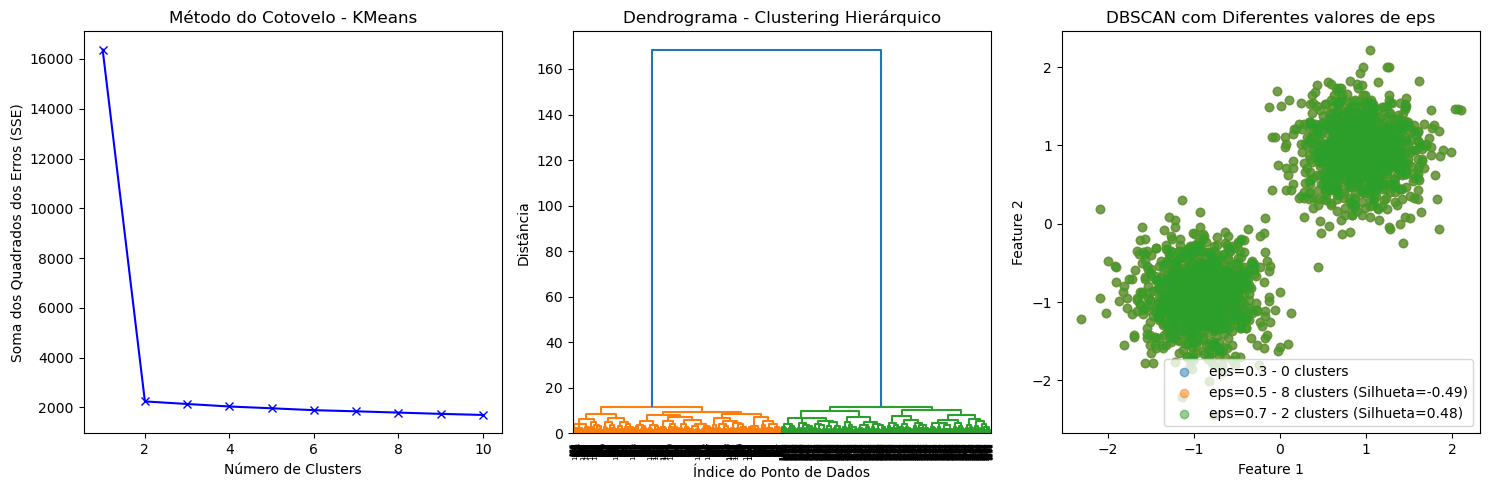

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import pairwise_distances_argmin_min



data = pd.read_csv('Dados/dataset1.txt', delimiter='\s+',engine='python')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados dos Erros (SSE)')
plt.title('Método do Cotovelo - KMeans')

silhouette_scores = []
for k in K:
    if k > 1:  
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels_kmeans = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, labels_kmeans)
        silhouette_scores.append(silhouette_avg)
        print(f'Coeficiente de Silhueta KMeans para {k} clusters: {silhouette_avg:.2f}')
    else:
        silhouette_scores.append(None) 

Z = linkage(X_scaled, method='ward')
plt.subplot(1, 3, 2)
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('Distância')

for n_clusters in range(2, 12):  
    labels_hierarchical = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
    print(f'Coeficiente de Silhueta Hierárquico para {n_clusters} clusters: {silhouette_hierarchical}')


eps_values = [0.3, 0.5, 0.7] 
plt.subplot(1, 3, 3)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
    num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    if num_clusters > 1:  # Só calcular a silhueta se houver mais de um cluster
        silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label=f'eps={eps} - {num_clusters} clusters (Silhueta={silhouette_dbscan:.2f})', alpha=0.5)
    else:
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label=f'eps={eps} - {num_clusters} clusters', alpha=0.5)

plt.title('DBSCAN com Diferentes valores de eps')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

Avaliando os coeficientes e gráficos fica claro que o dataset1 tem 2 clusters.

## Dataset2

Coeficiente de Silhueta KMeans para 2 clusters: 0.42
Coeficiente de Silhueta KMeans para 3 clusters: 0.22
Coeficiente de Silhueta KMeans para 4 clusters: 0.01
Coeficiente de Silhueta KMeans para 5 clusters: 0.01
Coeficiente de Silhueta KMeans para 6 clusters: 0.01
Coeficiente de Silhueta KMeans para 7 clusters: 0.01
Coeficiente de Silhueta KMeans para 8 clusters: 0.01
Coeficiente de Silhueta KMeans para 9 clusters: 0.01
Coeficiente de Silhueta KMeans para 10 clusters: 0.01
Coeficiente de Silhueta Hierárquico para 2 clusters: 0.42374807609537213
Coeficiente de Silhueta Hierárquico para 3 clusters: 0.21262525606204633
Coeficiente de Silhueta Hierárquico para 4 clusters: 0.21214439592092024
Coeficiente de Silhueta Hierárquico para 5 clusters: 0.004700365500015886
Coeficiente de Silhueta Hierárquico para 6 clusters: 0.003588186258634163
Coeficiente de Silhueta Hierárquico para 7 clusters: 0.0020592897358038377
Coeficiente de Silhueta Hierárquico para 8 clusters: 0.0025628728122003646
Coefi

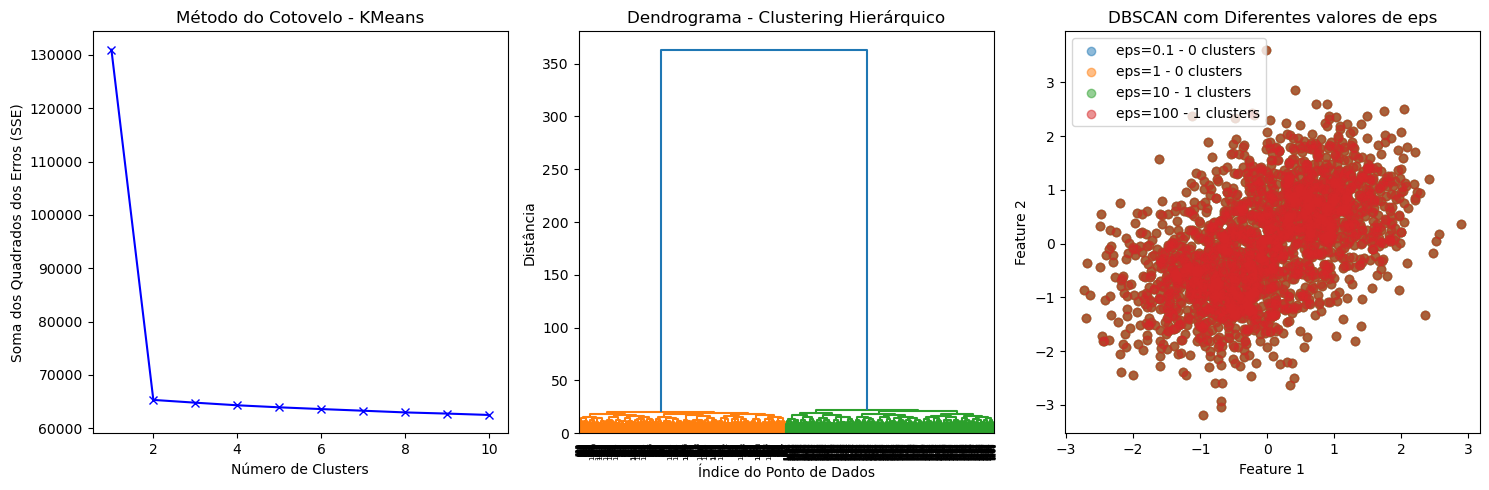

In [7]:
data = pd.read_csv('Dados/dataset2.txt', delimiter='\s+',engine='python')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados dos Erros (SSE)')
plt.title('Método do Cotovelo - KMeans')

silhouette_scores = []
for k in K:
    if k > 1: 
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels_kmeans = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, labels_kmeans)
        silhouette_scores.append(silhouette_avg)
        print(f'Coeficiente de Silhueta KMeans para {k} clusters: {silhouette_avg:.2f}')
    else:
        silhouette_scores.append(None) 

Z = linkage(X_scaled, method='ward')
plt.subplot(1, 3, 2)
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('Distância')

for n_clusters in range(2, 12): 
    labels_hierarchical = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
    print(f'Coeficiente de Silhueta Hierárquico para {n_clusters} clusters: {silhouette_hierarchical}')


eps_values = [0.1,1,10,100] 
plt.subplot(1, 3, 3)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
    num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    if num_clusters > 1: 
        silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label=f'eps={eps} - {num_clusters} clusters (Silhueta={silhouette_dbscan:.2f})', alpha=0.5)
    else:
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label=f'eps={eps} - {num_clusters} clusters', alpha=0.5)

plt.title('DBSCAN com Diferentes valores de eps')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

Avaliando os coeficientes e gráficos o mais provável é que o dataset2 tem 2 clusters, principalmente pelo método do cotovelo e coeficiente de silhueta.

## Dataset3

Coeficiente de Silhueta KMeans para 2 clusters: 0.38
Coeficiente de Silhueta KMeans para 3 clusters: 0.39
Coeficiente de Silhueta KMeans para 4 clusters: 0.48
Coeficiente de Silhueta KMeans para 5 clusters: 0.58
Coeficiente de Silhueta KMeans para 6 clusters: 0.67
Coeficiente de Silhueta KMeans para 7 clusters: 0.76
Coeficiente de Silhueta KMeans para 8 clusters: 0.83
Coeficiente de Silhueta KMeans para 9 clusters: 0.90
Coeficiente de Silhueta KMeans para 10 clusters: 0.81
Coeficiente de Silhueta KMeans para 11 clusters: 0.73
Coeficiente de Silhueta Hierárquico para 2 clusters: 0.3844363001115715
Coeficiente de Silhueta Hierárquico para 3 clusters: 0.3935295907211143
Coeficiente de Silhueta Hierárquico para 4 clusters: 0.4807998759508688
Coeficiente de Silhueta Hierárquico para 5 clusters: 0.5826495829017275
Coeficiente de Silhueta Hierárquico para 6 clusters: 0.6661624662061405
Coeficiente de Silhueta Hierárquico para 7 clusters: 0.7622277038023982
Coeficiente de Silhueta Hierárquico 

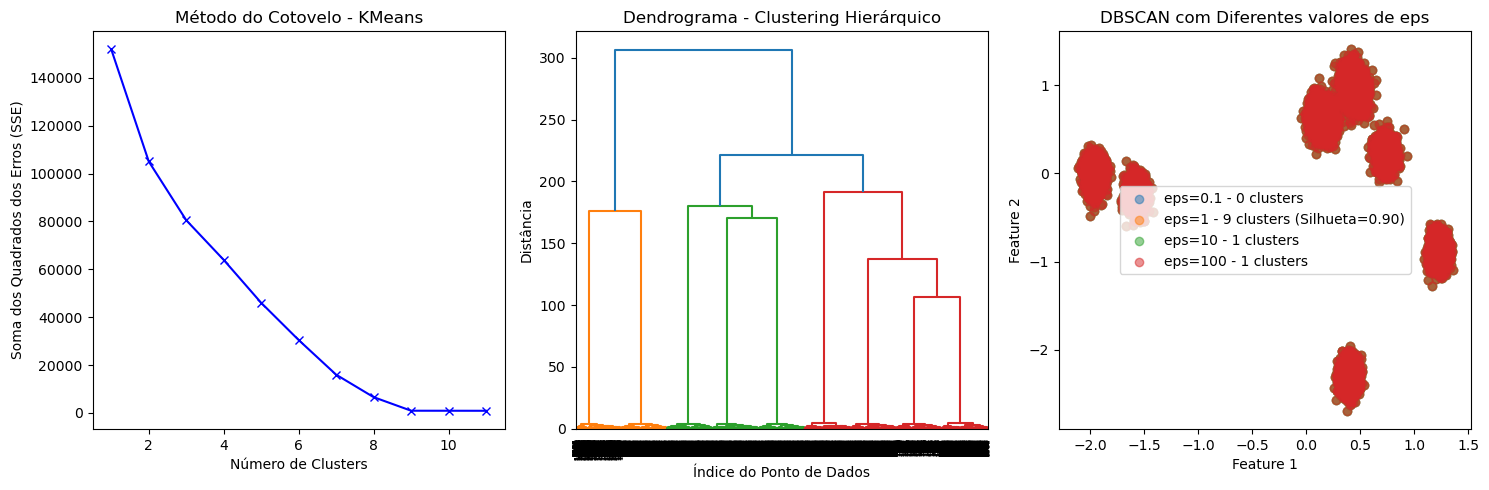

In [5]:
data = pd.read_csv('Dados/dataset3.txt', delimiter='\s+',engine='python')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

sse = []
K = range(1, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados dos Erros (SSE)')
plt.title('Método do Cotovelo - KMeans')

silhouette_scores = []
for k in K:
    if k > 1:
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels_kmeans = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, labels_kmeans)
        silhouette_scores.append(silhouette_avg)
        print(f'Coeficiente de Silhueta KMeans para {k} clusters: {silhouette_avg:.2f}')
    else:
        silhouette_scores.append(None) 

Z = linkage(X_scaled, method='ward')
plt.subplot(1, 3, 2)
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('Distância')

for n_clusters in range(2, 12): 
    labels_hierarchical = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
    print(f'Coeficiente de Silhueta Hierárquico para {n_clusters} clusters: {silhouette_hierarchical}')


eps_values = [0.1,1,10,100]
plt.subplot(1, 3, 3)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
    num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    if num_clusters > 1:  
        silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label=f'eps={eps} - {num_clusters} clusters (Silhueta={silhouette_dbscan:.2f})', alpha=0.5)
    else:
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label=f'eps={eps} - {num_clusters} clusters', alpha=0.5)

plt.title('DBSCAN com Diferentes valores de eps')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

Avaliando os coeficientes e gráficos fica claro que o dataset3 tem 9 clusters.

## Dataset4

C:\Users\Jose\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Jose\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Jose\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Coeficiente de Silhueta Hierárquico para 2 clusters: 0.13098121429515291
Coeficiente de Silhueta Hierárquico para 3 clusters: 0.1931523569599553
Coeficiente de Silhueta Hierárquico para 4 clusters: 0.2527469207712603
Coeficiente de Silhueta Hierárquico para 5 clusters: 0.31424724129330817
Coeficiente de Silhueta Hierárquico para 6 clusters: 0.37512902896014777
Coeficiente de Silhueta Hierárquico para 7 clusters: 0.4365562861001994
Coeficiente de Silhueta Hierárquico para 8 clusters: 0.4979849292871895
Coeficiente de Silhueta Hierárquico para 9 clusters: 0.5593940460607996
Coeficiente de Silhueta Hierárquico para 10 clusters: 0.6209928487825377
Coeficiente de Silhueta Hierárquico para 11 clusters: 0.6823969115154148
Coeficiente de Silhueta Hierárquico para 12 clusters: 0.744567029175085
Coeficiente de Silhueta Hierárquico para 13 clusters: 0.8060221124651299
Coeficiente de Silhueta Hierárquico para 14 clusters: 0.8671319756149316
Coeficiente de Silhueta Hierárquico para 15 clusters: 0.9

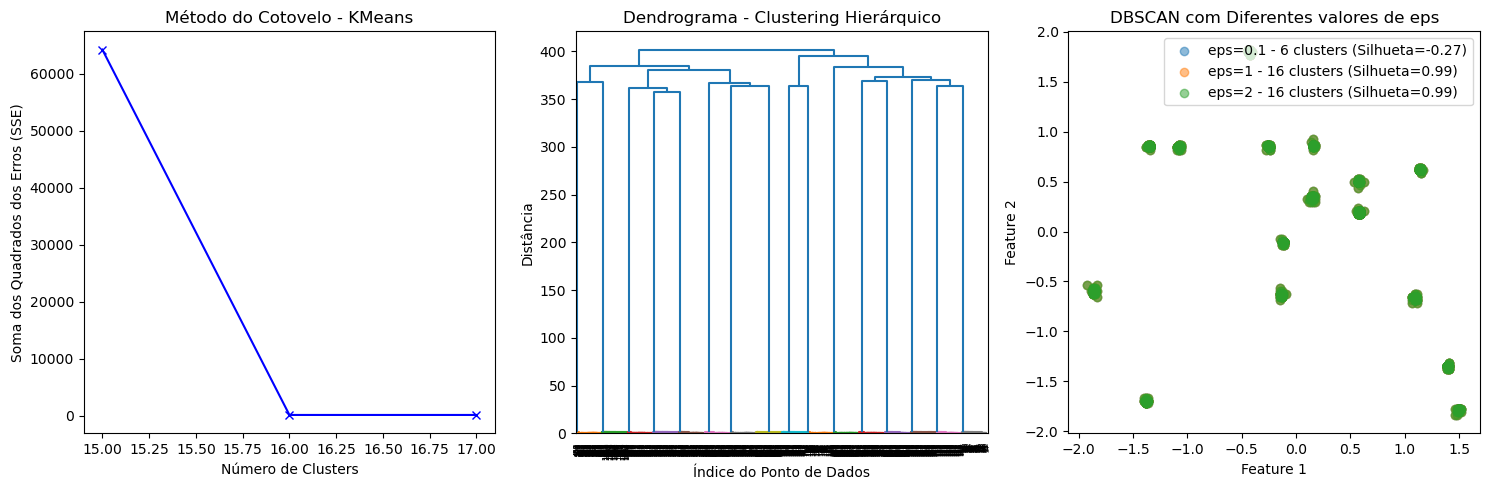

In [16]:
data = pd.read_csv('Dados/dataset4.txt', delimiter='\s+',engine='python')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
OMP_NUM_THREADS=4
sse = []
K = range(15, 18)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados dos Erros (SSE)')
plt.title('Método do Cotovelo - KMeans')

Z = linkage(X_scaled, method='ward')
plt.subplot(1, 3, 2)
dendrogram(Z)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('Distância')

for n_clusters in range(2, 20): 
    labels_hierarchical = fcluster(Z, t=n_clusters, criterion='maxclust')
    silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
    print(f'Coeficiente de Silhueta Hierárquico para {n_clusters} clusters: {silhouette_hierarchical}')


eps_values = [0.1,1,2]
plt.subplot(1, 3, 3)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
    num_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    if num_clusters > 1:  
        silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label=f'eps={eps} - {num_clusters} clusters (Silhueta={silhouette_dbscan:.2f})', alpha=0.5)
    else:
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label=f'eps={eps} - {num_clusters} clusters', alpha=0.5)

plt.title('DBSCAN com Diferentes valores de eps')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
Avaliando os coeficientes e gráficos fica claro que o dataset4 tem 16 clusters.